<a href="https://colab.research.google.com/github/aravind2225/Stock-Price-Forecast/blob/main/Stock_Price_Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv('/content/Quote-Equity-ZOMATO-EQ-30-08-2022-to-30-08-2023.csv',sep='\t')
df

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,30-Aug-23,EQ,99.50,100.50,97.20,94.70,99.70,99.80,99.07,102.85,44.35,"25,01,11,714","24,77,96,74,439.50","4,42,887"
1,29-Aug-23,EQ,92.75,95.00,92.60,92.35,94.60,94.70,94.14,102.85,44.35,"8,67,08,316","8,16,30,85,797.95","1,86,335"
2,28-Aug-23,EQ,96.00,96.10,91.75,91.00,92.35,92.35,92.93,102.85,44.35,"14,11,18,441","13,11,38,59,418.30","4,14,969"
3,25-Aug-23,EQ,93.35,93.35,90.05,93.80,92.05,91.00,91.19,102.85,44.35,"6,50,76,321","5,93,42,57,006.65","1,52,123"
4,24-Aug-23,EQ,95.75,95.75,93.20,94.30,93.65,93.80,94.11,102.85,44.35,"4,75,97,101","4,47,94,79,669.05","1,02,141"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,06-Sep-22,EQ,60.30,60.80,59.40,59.65,59.65,59.70,59.94,169.00,40.60,"7,01,86,636","4,20,70,70,296.50","1,03,795"
245,05-Sep-22,EQ,60.45,60.80,59.30,59.75,59.80,59.65,59.96,169.00,40.60,"8,45,39,046","5,06,86,62,937.15","1,46,788"
246,02-Sep-22,EQ,63.40,63.40,59.40,62.45,59.60,59.75,60.54,169.00,40.60,"13,79,46,710","8,35,06,17,879.80","2,14,212"
247,01-Sep-22,EQ,58.70,63.15,58.25,57.95,62.80,62.45,60.77,169.00,40.60,"19,24,77,817","11,69,76,78,086.70","2,71,246"


In [2]:
print(df.shape)
print(df.size)
print(df.info())

(249, 14)
3486
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           249 non-null    object 
 1   series         249 non-null    object 
 2   OPEN           249 non-null    float64
 3   HIGH           249 non-null    float64
 4   LOW            249 non-null    float64
 5   PREV. CLOSE    249 non-null    float64
 6   ltp            249 non-null    float64
 7   close          249 non-null    float64
 8   vwap           249 non-null    float64
 9   52W H          249 non-null    float64
 10  52W L          249 non-null    float64
 11  VOLUME         249 non-null    object 
 12  VALUE          249 non-null    object 
 13  No of trades   249 non-null    object 
dtypes: float64(9), object(5)
memory usage: 27.4+ KB
None


In [3]:
df.isnull().sum()

,0
Date,0
series,0
OPEN,0
HIGH,0
LOW,0
PREV. CLOSE,0
ltp,0
close,0
vwap,0
52W H,0


In [4]:
df.nunique()

,0
Date,249
series,1
OPEN,201
HIGH,197
LOW,203
PREV. CLOSE,198
ltp,197
close,198
vwap,240
52W H,27


In [5]:
df.columns=['Date',	'series','OPEN','HIGH',	'LOW','CLOSE','ltp','close','vwap','52W H','52W L','VOLUME','VALUE','No of trades']
df

,Date,series,OPEN,HIGH,LOW,CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,30-Aug-23,EQ,99.50,100.50,97.20,94.70,99.70,99.80,99.07,102.85,44.35,"25,01,11,714","24,77,96,74,439.50","4,42,887"
1,29-Aug-23,EQ,92.75,95.00,92.60,92.35,94.60,94.70,94.14,102.85,44.35,"8,67,08,316","8,16,30,85,797.95","1,86,335"
2,28-Aug-23,EQ,96.00,96.10,91.75,91.00,92.35,92.35,92.93,102.85,44.35,"14,11,18,441","13,11,38,59,418.30","4,14,969"
3,25-Aug-23,EQ,93.35,93.35,90.05,93.80,92.05,91.00,91.19,102.85,44.35,"6,50,76,321","5,93,42,57,006.65","1,52,123"
4,24-Aug-23,EQ,95.75,95.75,93.20,94.30,93.65,93.80,94.11,102.85,44.35,"4,75,97,101","4,47,94,79,669.05","1,02,141"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,06-Sep-22,EQ,60.30,60.80,59.40,59.65,59.65,59.70,59.94,169.00,40.60,"7,01,86,636","4,20,70,70,296.50","1,03,795"
245,05-Sep-22,EQ,60.45,60.80,59.30,59.75,59.80,59.65,59.96,169.00,40.60,"8,45,39,046","5,06,86,62,937.15","1,46,788"
246,02-Sep-22,EQ,63.40,63.40,59.40,62.45,59.60,59.75,60.54,169.00,40.60,"13,79,46,710","8,35,06,17,879.80","2,14,212"
247,01-Sep-22,EQ,58.70,63.15,58.25,57.95,62.80,62.45,60.77,169.00,40.60,"19,24,77,817","11,69,76,78,086.70","2,71,246"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          249 non-null    object 
 1   series        249 non-null    object 
 2   OPEN          249 non-null    float64
 3   HIGH          249 non-null    float64
 4   LOW           249 non-null    float64
 5   CLOSE         249 non-null    float64
 6   ltp           249 non-null    float64
 7   close         249 non-null    float64
 8   vwap          249 non-null    float64
 9   52W H         249 non-null    float64
 10  52W L         249 non-null    float64
 11  VOLUME        249 non-null    object 
 12  VALUE         249 non-null    object 
 13  No of trades  249 non-null    object 
dtypes: float64(9), object(5)
memory usage: 27.4+ KB


In [7]:
#we need to convert the date of string format to date format
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          249 non-null    datetime64[ns]
 1   series        249 non-null    object        
 2   OPEN          249 non-null    float64       
 3   HIGH          249 non-null    float64       
 4   LOW           249 non-null    float64       
 5   CLOSE         249 non-null    float64       
 6   ltp           249 non-null    float64       
 7   close         249 non-null    float64       
 8   vwap          249 non-null    float64       
 9   52W H         249 non-null    float64       
 10  52W L         249 non-null    float64       
 11  VOLUME        249 non-null    object        
 12  VALUE         249 non-null    object        
 13  No of trades  249 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(4)
memory usage: 27.4+ KB


<ipython-input-7-92874c8f31f7>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


In [8]:
df=df.rename(columns={'Date':'ds','LOW':'y'})
df

,ds,series,OPEN,HIGH,y,CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,2023-08-30,EQ,99.50,100.50,97.20,94.70,99.70,99.80,99.07,102.85,44.35,"25,01,11,714","24,77,96,74,439.50","4,42,887"
1,2023-08-29,EQ,92.75,95.00,92.60,92.35,94.60,94.70,94.14,102.85,44.35,"8,67,08,316","8,16,30,85,797.95","1,86,335"
2,2023-08-28,EQ,96.00,96.10,91.75,91.00,92.35,92.35,92.93,102.85,44.35,"14,11,18,441","13,11,38,59,418.30","4,14,969"
3,2023-08-25,EQ,93.35,93.35,90.05,93.80,92.05,91.00,91.19,102.85,44.35,"6,50,76,321","5,93,42,57,006.65","1,52,123"
4,2023-08-24,EQ,95.75,95.75,93.20,94.30,93.65,93.80,94.11,102.85,44.35,"4,75,97,101","4,47,94,79,669.05","1,02,141"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2022-09-06,EQ,60.30,60.80,59.40,59.65,59.65,59.70,59.94,169.00,40.60,"7,01,86,636","4,20,70,70,296.50","1,03,795"
245,2022-09-05,EQ,60.45,60.80,59.30,59.75,59.80,59.65,59.96,169.00,40.60,"8,45,39,046","5,06,86,62,937.15","1,46,788"
246,2022-09-02,EQ,63.40,63.40,59.40,62.45,59.60,59.75,60.54,169.00,40.60,"13,79,46,710","8,35,06,17,879.80","2,14,212"
247,2022-09-01,EQ,58.70,63.15,58.25,57.95,62.80,62.45,60.77,169.00,40.60,"19,24,77,817","11,69,76,78,086.70","2,71,246"


In [9]:
df1=df[['ds','y']]
df1

,ds,y
0,2023-08-30,97.20
1,2023-08-29,92.60
2,2023-08-28,91.75
3,2023-08-25,90.05
4,2023-08-24,93.20
...,...,...
244,2022-09-06,59.40
245,2022-09-05,59.30
246,2022-09-02,59.40
247,2022-09-01,58.25


Text(0.5, 1.0, 'Day vs Lower rate')

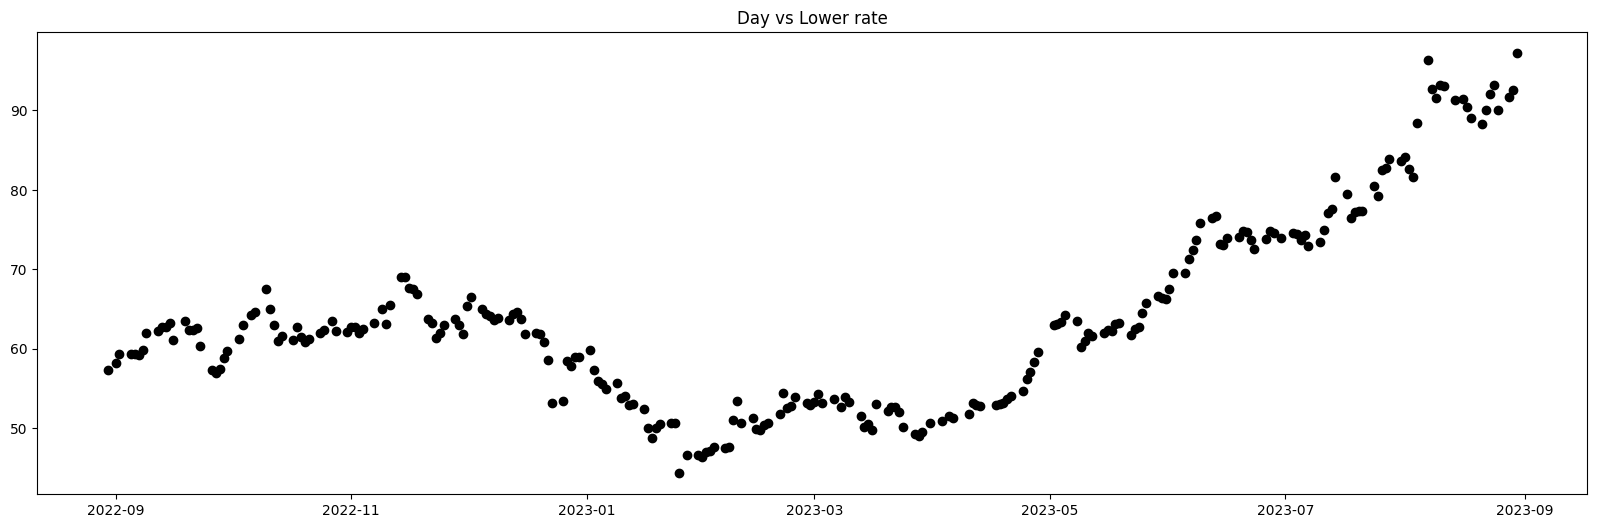

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.scatter(df1['ds'],df1['y'],color='black')
plt.title('Day vs Lower rate')

In [11]:
import prophet
op=prophet.Prophet()
op.fit(df1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyy7_p5d1/7cvzt_h8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyy7_p5d1/r26o0918.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66108', 'data', 'file=/tmp/tmpyy7_p5d1/7cvzt_h8.json', 'init=/tmp/tmpyy7_p5d1/r26o0918.json', 'output', 'file=/tmp/tmpyy7_p5d1/prophet_modeln_yjbcua/prophet_model-20250224190624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:06:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:06:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [12]:
forecast=op.make_future_dataframe(periods=10,freq='D')
forecast=op.predict(forecast)
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
254,2023-09-05,94.569384,91.790038,98.260312,94.524490,94.636603,0.353856,0.353856,0.353856,0.353856,0.353856,0.353856,0.0,0.0,0.0,94.923240
255,2023-09-06,94.855548,91.717346,98.235391,94.787838,94.952508,0.254703,0.254703,0.254703,0.254703,0.254703,0.254703,0.0,0.0,0.0,95.110252
256,2023-09-07,95.141713,92.229991,98.913522,95.042566,95.281569,0.545598,0.545598,0.545598,0.545598,0.545598,0.545598,0.0,0.0,0.0,95.687311
257,2023-09-08,95.427877,92.841622,98.999488,95.303806,95.607399,0.546229,0.546229,0.546229,0.546229,0.546229,0.546229,0.0,0.0,0.0,95.974106
258,2023-09-09,95.714041,91.322973,97.934033,95.549638,95.932997,-1.089393,-1.089393,-1.089393,-1.089393,-1.089393,-1.089393,0.0,0.0,0.0,94.624648


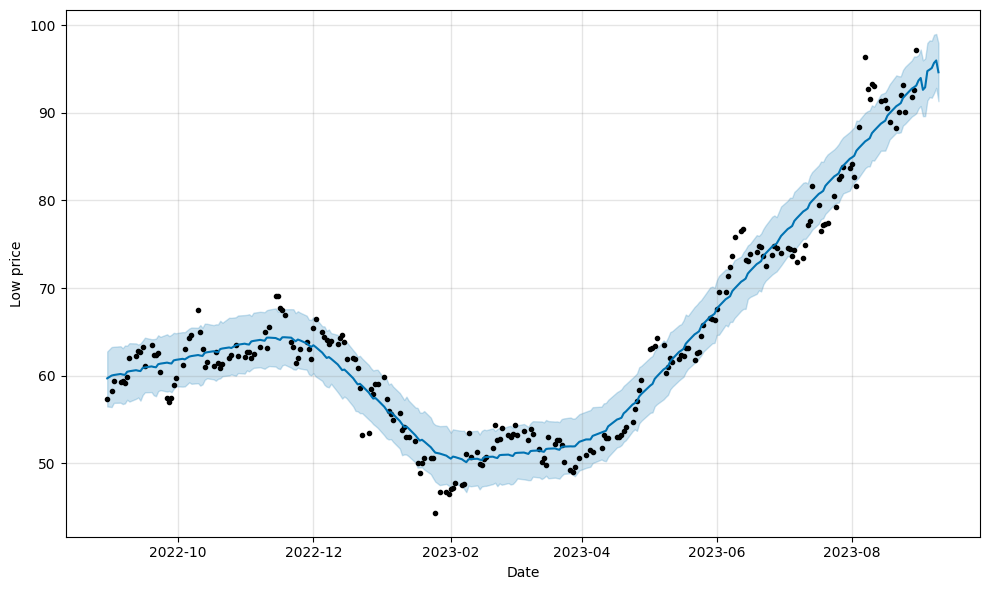

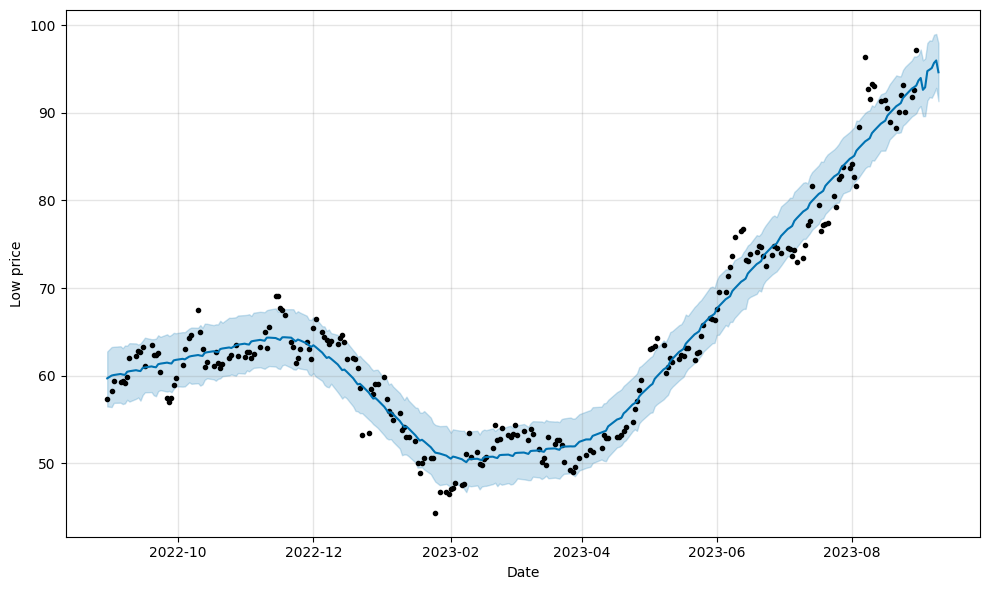

In [13]:
op.plot(forecast,xlabel='Date',ylabel='Low price')

In [14]:
from sklearn.metrics import r2_score
r2_score(df1['y'][::-1],forecast['yhat'][0:249])*100

95.47069402917501